# Profitable App Profiles for the App Store and Google Play Markets

At our company, apps are available on Google Play and in the App Store. We only build apps that are free to download and install, so our main source of revenue is in-app adds. This means that the more users who see and engage with the ads, the better. 

As data analysts working in a company that builds Android and iOS mobile apps, we analyze data to help developers understand what type of apps are likely to attract more users.

## Opening and Exploring the Data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

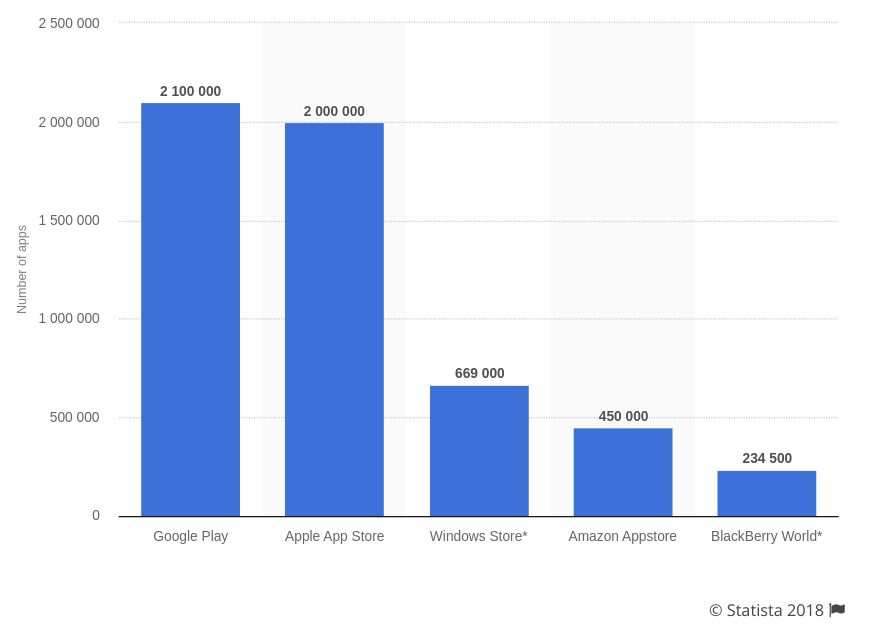

Source: [Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, here are two data sets that seem suitable for our goals:

* [A dataset](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
* [A dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

We'll start by opening the two datasets before exploring our data.

In [2]:
from csv import reader

# The Google Play dataset
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android_data = android[1:]

# The App Store dataset
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios_data = ios[1:]

To make them easier to explore, we created a function named `explore_data()` that we can repeatedly use to print rows in a readable way.

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Let's take a look at our Android data.

In [4]:
print(android_header)
print('\n')
explore_data(android_data, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


Now we know that in the Google Play, there are 10,841 apps. Our data has 13 columns which describe the attributes of each app. Some columns that could help us with our analysis are `'App'`, `'Category'`, `'Rating'`, `'Installs'`, `'Price'`, and `'Genres'`.

Next, let's take a look at our iOS data.

In [5]:
print(ios_header)
print('\n')
explore_data(ios_data, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


The Apple Store has 7,197 apps, which is less apps than Google Play. In terms of columns, there are more attributes in iOS data than Android data. Some columns that could help us with our analysis are `'track_name'`, `'currency'`, `'price'`, `'user_rating'`, and `'prime_genre'`.

Some of the column names are not self-explanatory, but we can always find more information about our data in the [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## Deleting Wrong Data

Before beginning our analysis, we need to make sure the data we analyze is accurate, or the results of our analysis will be wrong. The Google Play dataset has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) describes an error in which column entry is shifted to another column. Let's check which rows have this error using a function called `row_with_missing_col()` to find index of rows with missing column value(s).

In [6]:
print(android_header)
print('\n')

def row_with_missing_col(dataset):
    error_indices = []
    for row in android_data:
        if len(row) != len(android_header):
            error_index = android_data.index(row)
            error_indices.append(error_index)
            print(row)
            print('\n')
    return error_indices

print('Error found in Google Play dataset with index: ')
print(row_with_missing_col(android_data))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Error found in Google Play dataset with index: 
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


[10472]


As we can see, the rating of 'Life Made WI-Fi Touchscreen Photo Frame' app is 19, meanwhile maximum value of rating in Google Play is 5. So, we'll remove this row.

In [7]:
print('Google Play dataset rows (before deletion): ' + str(len(android_data)))
del android_data[10472] # don't do this more that once
print('Google Play dataset rows (after deletion): ' + str(len(android_data)))

Google Play dataset rows (before deletion): 10841
Google Play dataset rows (after deletion): 10840


Now, let's check our Apple Store dataset to ensure there is no missing value in our dataset. We'll do this by calling the same function that we used on our Google Play dataset.

In [8]:
print(ios_header)
print('\n')
print('Error found in Apple Store dataset with index: ')
print(row_with_missing_col(ios_data))

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


Error found in Apple Store dataset with index: 
[]


It turns out that the same error is not found in our Apple Store dataset. So, we'll check our datasets for any other error. 

## Removing Duplicate Entries

### Part 1

After taking a look at the [discussions](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion) section, another problem we have in our dataset is duplicate entries. For instance, 'Google Ads' has 3 entries:

In [9]:
for app in android_data:
    name = app[0]
    if name == 'Google Ads':
        print(app)

['Google Ads', 'BUSINESS', '4.3', '29313', '20M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 30, 2018', '1.12.0', '4.0.3 and up']
['Google Ads', 'BUSINESS', '4.3', '29313', '20M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 30, 2018', '1.12.0', '4.0.3 and up']
['Google Ads', 'BUSINESS', '4.3', '29331', '20M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 30, 2018', '1.12.0', '4.0.3 and up']


We need to remove the duplicates. Before doing so, we need to identify which apps have duplicate entries

In [10]:
duplicate_apps = []
unique_apps = []

for app in android_data:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Example of duplicate apps: ', duplicate_apps[:15])

Number of duplicate apps:  1181


Example of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


If we examine the rows, we can see that the difference between each row is in the 4th column (number of reviews). The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

### Part 2

Let's create a dictionary of highest review of each app in our Google Play dataset.

In [11]:
reviews_max = {}

for app in android_data:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

Next, we'll remove duplicates from our dataset so that we'll be left with a list of unique apps with highest review.

In [12]:
android_clean = []
already_added = []

for app in android_data:
    name = app[0]
    n_reviews = float(app[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(app)
        already_added.append(name)

print(android_header)
print('\n')
explore_data(android_clean, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


## Removing Non-English Apps

#### Parth 1

Previously, we removed the duplicate app entries in the Google Play dataset. We don't need to do the same for the App Store dataset because there are no duplicates.

Since we use English for the apps we develop at our company, and we'd like to analyze only the apps that are designed for an English-speaking audience. However, both datasets have apps with names that suggest they are not designed for English-speaking audience like the names below.

In [13]:
print(ios_data[813][1])
print(ios_data[6731][1])
print('\n')
print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜


中国語 AQリスニング
لعبة تقدر تربح DZ


We're not interested in keeping these apps, so we'll remove them. One way to do this is to remove each app with a name containing a symbol that isn't commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, *, /).

Each character we use in a string has a corresponding number associated with it. We can get the corresponding number of each character using the [ord() built-in function](https://docs.python.org/3/library/functions.html#ord). The following function will utilize that built-in function to determine whether the app name is English.


In [14]:
def is_english(a_string):
    for char in a_string:
        if ord(char) > 127:
            return False
    return True

print('Instagram --> ', is_english('Instagram'))
print('爱奇艺PPS -《欢乐颂2》电视剧热播 --> ', is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print('Docs To Go™ Free Office Suite --> ', is_english('Docs To Go™ Free Office Suite'))
print('Instachat 😜 --> ', is_english('Instachat 😜'))

Instagram -->  True
爱奇艺PPS -《欢乐颂2》电视剧热播 -->  False
Docs To Go™ Free Office Suite -->  False
Instachat 😜 -->  False


When we tried to evaluate several strings above, the function didn't correctly all English app names like `Docs To Go™ Free Office Suite` and `'Instachat 😜'`. This is because emojis and characters like `™` fall outside the ASCII range and have corresponding numbers over 127.

In [15]:
print('ASCII for ™: ', ord('™'))
print('ASCII for 😜: ', ord('😜'))

ASCII for ™:  8482
ASCII for 😜:  128540


### Part 2

If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range.

Below is the revised `is_english()` function.

In [16]:
def is_english(a_string):
    count = 0
    for char in a_string:
        if ord(char) > 127:
            count += 1
    if count >= 3:
        return False
    else:
        return True

print('Instagram --> ', is_english('Instagram'))
print('爱奇艺PPS -《欢乐颂2》电视剧热播 --> ', is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print('Docs To Go™ Free Office Suite --> ', is_english('Docs To Go™ Free Office Suite'))
print('Instachat 😜 --> ', is_english('Instachat 😜'))

Instagram -->  True
爱奇艺PPS -《欢乐颂2》电视剧热播 -->  False
Docs To Go™ Free Office Suite -->  True
Instachat 😜 -->  True


Now that our function has correctly identify our test app names, we'll use it to filter out non-English apps from both datasets.

In [17]:
android_eng = []
ios_eng = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_eng.append(app)

for app in ios_data:
    name = app[1]
    if is_english(name):
        ios_eng.append(app)

explore_data(android_eng, 0, 3, True)
print('\n')
explore_data(ios_eng, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9597
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

In [18]:
android_free = []
ios_free = []

for app in android_eng:
    price = app[7]
    if price == '0':
        android_free.append(app)

for app in ios_eng:
    price = app[4]
    if price == '0.0':
        ios_free.append(app)

explore_data(android_free, 0, 3, True)
print('\n')
explore_data(ios_free, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 8848
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Most Common Apps by Genre

### Part 1

As we mentioned in the introduction, our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue.

To minimize risks and overhead, our validation strategy for an app idea has three steps:
1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by determining the most common genres for each market. For this, we'll need to build frequency tables for a few columns in our datasets. For this, we'll build a frequency table for the `prime_genre` column of the App Store data set, and the `Genres` and `Category` columns of the Google Play data set.



### Part 2

We'll build two functions we can use to analyze the frequency tables:

- One function to generate frequency tables that show percentages
- Another function we can use to display the percentages in a descending order

In [19]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Part 3

We'll start by analyzing the frequency table for the `prime_genre` column of the App Store dataset

In [20]:
display_table(ios_free, -5)

Games : 58.25788323446769
Entertainment : 7.836403371838902
Photo & Video : 4.995316890415236
Education : 3.6840462066812365
Social Networking : 3.3093974399000934
Shopping : 2.5913206369029034
Utilities : 2.466437714642523
Sports : 2.1542304089915705
Music : 2.0605682172962845
Health & Fitness : 2.0293474867311896
Productivity : 1.7483609116453322
Lifestyle : 1.5610365282547611
News : 1.3424914142990947
Travel : 1.248829222603809
Finance : 1.0927255697783327
Weather : 0.8741804558226661
Food & Drink : 0.8117389946924758
Reference : 0.5307524196066188
Business : 0.5307524196066188
Book : 0.3746487667811427
Navigation : 0.18732438339057134
Medical : 0.18732438339057134
Catalogs : 0.1248829222603809


We can see that in our App Store dataset, the most common genre of free English apps is Games (> 58.26%). It is followed by Entertainment with around 7.84% and Photo & Video with around 5%. This gives the general impression that most of the apps are designed for entertainment purposes (games, photo and video, social networking, sports, music). Apps designed for practical purposes (education, shopping, utilities, productivity, lifestyle) are rare in comparison.

Even though we now know that certain genres have a large number of apps, it does not imply that apps of that genre generally have a large number of users since the demand might not be the same with the supply. 

Next, we'll analyze the frequency table for `Category` and `Genres` column of the Google Play dataset.

In [21]:
display_table(android_free, 1) # Category

FAMILY : 18.942133815551536
GAME : 9.697106690777577
TOOLS : 8.453887884267631
BUSINESS : 4.599909584086799
PRODUCTIVITY : 3.899186256781193
LIFESTYLE : 3.887884267631103
FINANCE : 3.7070524412296564
MEDICAL : 3.5375226039783
SPORTS : 3.390596745027125
PERSONALIZATION : 3.322784810126582
COMMUNICATION : 3.2323688969258586
HEALTH_AND_FITNESS : 3.0854430379746836
PHOTOGRAPHY : 2.949819168173599
NEWS_AND_MAGAZINES : 2.802893309222423
SOCIAL : 2.667269439421338
TRAVEL_AND_LOCAL : 2.3395117540687163
SHOPPING : 2.2490958408679926
BOOKS_AND_REFERENCE : 2.1360759493670884
DATING : 1.8648282097649187
VIDEO_PLAYERS : 1.7970162748643763
MAPS_AND_NAVIGATION : 1.3901446654611211
FOOD_AND_DRINK : 1.2432188065099457
EDUCATION : 1.164104882459313
ENTERTAINMENT : 0.9606690777576853
LIBRARIES_AND_DEMO : 0.9380650994575045
AUTO_AND_VEHICLES : 0.9267631103074141
HOUSE_AND_HOME : 0.8024412296564195
WEATHER : 0.7911392405063291
EVENTS : 0.7120253164556962
PARENTING : 0.6555153707052441
ART_AND_DESIGN : 0.64

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids. Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the `Genres` column:

In [22]:
display_table(android_free, -4) # Genres

Tools : 8.44258589511754
Entertainment : 6.080470162748644
Education : 5.357142857142857
Business : 4.599909584086799
Productivity : 3.899186256781193
Lifestyle : 3.8765822784810124
Finance : 3.7070524412296564
Medical : 3.5375226039783
Sports : 3.4584086799276674
Personalization : 3.322784810126582
Communication : 3.2323688969258586
Action : 3.096745027124774
Health & Fitness : 3.0854430379746836
Photography : 2.949819168173599
News & Magazines : 2.802893309222423
Social : 2.667269439421338
Travel & Local : 2.328209764918626
Shopping : 2.2490958408679926
Books & Reference : 2.1360759493670884
Simulation : 2.0456600361663653
Dating : 1.8648282097649187
Arcade : 1.842224231464738
Video Players & Editors : 1.7744122965641953
Casual : 1.763110307414105
Maps & Navigation : 1.3901446654611211
Food & Drink : 1.2432188065099457
Puzzle : 1.1301989150090417
Racing : 0.9945750452079566
Role Playing : 0.9380650994575045
Libraries & Demo : 0.9380650994575045
Auto & Vehicles : 0.9267631103074141
St

The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the `Installs` column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [24]:
genres_ios = freq_table(ios_free, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_free:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22886.36709539121
Music : 57326.530303030304
Reference : 79350.4705882353
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 19156.493670886077
Travel : 28243.8
Shopping : 27230.734939759037
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16815.48
Entertainment : 14195.358565737051
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 46384.916666666664
Finance : 32367.02857142857
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [26]:
for app in ios_free:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [28]:
for app in ios_free:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

- Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

- Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

- Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

## Most Popular Apps by Genre on Google Play

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [30]:
display_table(android_free, 5) # the Installs columns

1,000,000+ : 15.75497287522604
100,000+ : 11.539330922242314
10,000,000+ : 10.567359855334539
10,000+ : 10.194394213381555
1,000+ : 8.39737793851718
100+ : 6.928119349005425
5,000,000+ : 6.826401446654612
500,000+ : 5.560578661844485
50,000+ : 4.769439421338156
5,000+ : 4.486889692585895
10+ : 3.5375226039783
500+ : 3.2436708860759493
50,000,000+ : 2.2830018083182644
100,000,000+ : 2.1360759493670884
50+ : 1.9213381555153706
5+ : 0.7911392405063291
1+ : 0.5085895117540687
500,000,000+ : 0.27124773960216997
1,000,000,000+ : 0.22603978300180833
0+ : 0.045207956600361664
0 : 0.011301989150090416


One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to `float` — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category).

In [31]:
categories_android = freq_table(android_free, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_free:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8814199.78835979
BUSINESS : 1712290.1474201474
COMICS : 832613.8888888889
COMMUNICATION : 38590581.08741259
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1360598.042253521
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1446158.2238372094
GAME : 15544014.51048951
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3650602.276666667
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10830251.970588235
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5145550.285714285
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_MAGAZ

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [32]:
for app in android_free:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [33]:
under_100_m = []

for app in android_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3617398.420849421

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [34]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [36]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

## Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.